### Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Specify the directory containing your module
module_dir = '/Users/gabrielvictorgomesferreira/artificial_intelligence/isu_classes/modules'

# Add the directory to sys.path if not already present
if module_dir not in sys.path:
    sys.path.append(module_dir)
    
from help_functions import *

from sklearn.preprocessing import StandardScaler, LabelEncoder

### Config

In [2]:
data_loc = "/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/Data/"
file_name = "spotify_songs.csv"

### Import Dataset

In [3]:
songs = pd.read_csv(data_loc + file_name)
rows, columns = songs.shape
print(f"The dataset contains {rows:,} rows and {columns} columns")
songs.head(1)

The dataset contains 32,833 rows and 23 columns


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102,0.0,0.0653,0.518,122.036,194754


### Data Preprocessing

In [4]:
def preprocesse_songs(df):
    scaler = StandardScaler()
    df.drop(columns=['playlist_name', 'playlist_id'], inplace=True)
    df.drop_duplicates(subset=['track_id'], inplace=True)
    df = df[(df.duration_ms > df.duration_ms.quantile(0.01))]
    df.dropna(inplace=True)
    df['track_album_release_date'] = standardize_date(df['track_album_release_date'])
    df['year'] = df['track_album_release_date'].dt.year
    df = df.drop(columns=['track_album_release_date'])
    # df[['tempo_scaled', 'loudness_scaled', 'year_scaled']] = scaler.fit_transform(df[['tempo', 'loudness', 'year']])

    return df

def assign_mood(row):
    if row['valence'] > 0.6 and row['energy'] > 0.6:
        return 'Happy'
    elif row['energy'] > 0.6 and row['danceability'] > 0.5:
        return 'Energetic'
    elif row['energy'] <= 0.6 and row['acousticness'] > 0.13:
        return 'Relaxed'
    elif row['valence'] <= 0.4 and row['energy'] <= 0.4:
        return 'Melancholic'
    else:
        return 'Neutral'  # or other fallback label
    
def enlable_data(df):

    mood_numeric_map = {
        'Neutral': 0,
        'Energetic': 1,
        'Happy': 2,
        'Melancholic': 3,
        'Relaxed': 4
    }

    df['mood'] = df.apply(assign_mood, axis=1)
    df['mood_numeric'] = df['mood'].map(mood_numeric_map)

    return df

In [5]:
# Call functions
songs = preprocesse_songs(songs)
songs = enlable_data(songs)
songs.head(1)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,mood,mood_numeric
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102,0.0,0.0653,0.518,122.036,194754,2019,Energetic,1


In [6]:
pre_model_df = songs.drop(columns=['mood_numeric', 'key', 'loudness', 'tempo', 'duration_ms', 'track_popularity', 'year', 'mode'])
numeric_columns = pre_model_df.select_dtypes(include=['number']).columns
pre_model_df.head()

,track_id,track_name,track_artist,track_album_id,track_album_name,playlist_genre,playlist_subgenre,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,mood
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,pop,dance pop,0.748,0.916,0.0583,0.1020,0.000000,0.0653,0.518,Energetic
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),pop,dance pop,0.726,0.815,0.0373,0.0724,0.004210,0.3570,0.693,Happy
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),pop,dance pop,0.675,0.931,0.0742,0.0794,0.000023,0.1100,0.613,Happy
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,pop,dance pop,0.718,0.930,0.1020,0.0287,0.000009,0.2040,0.277,Energetic
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),pop,dance pop,0.650,0.833,0.0359,0.0803,0.000000,0.0833,0.725,Happy


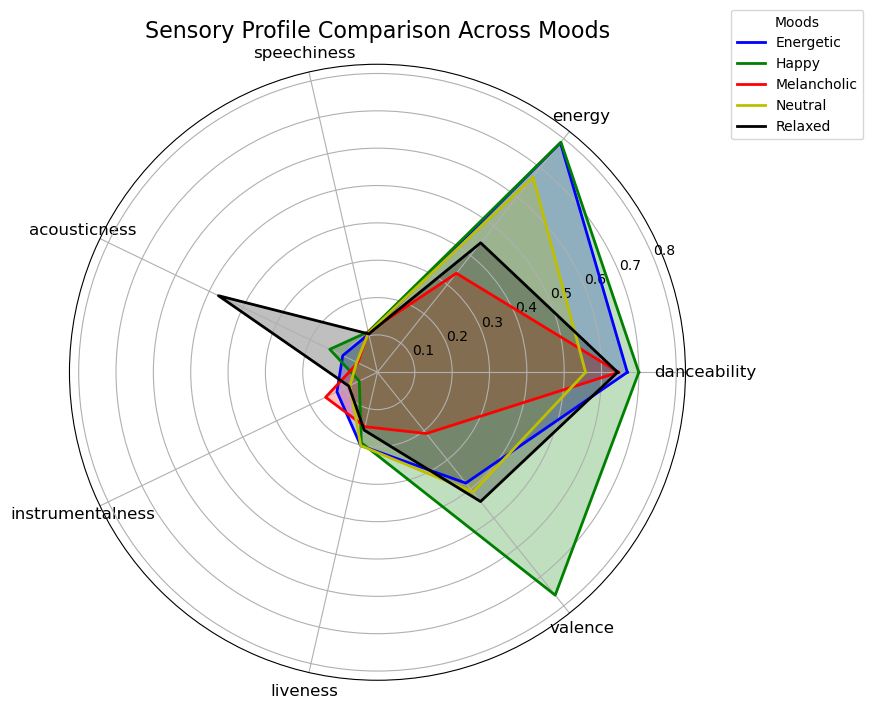

In [7]:
import matplotlib.pyplot as plt
from math import pi
from sklearn.preprocessing import StandardScaler
# Prepare data
avg_sensory = pre_model_df[(numeric_columns.tolist() + ['mood'])].groupby('mood').mean()
categories = avg_sensory.columns

# Setting up the radar chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Define angles for the radar chart
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

# Plot each genre on the same radar chart
colors = ['b', 'g', 'r', 'y', 'black'] 
for i, genre in enumerate(avg_sensory.index):
    values = avg_sensory.loc[genre].tolist()
    values += values[:1]
    
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=genre, color=colors[i % len(colors)])
    ax.fill(angles, values, alpha=0.25, color=colors[i % len(colors)])

# Add category labels
plt.xticks(angles[:-1], categories, fontsize=12)
plt.title('Sensory Profile Comparison Across Moods', fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), title='Moods')
plt.show()

In [8]:
method = input("Choose one of the following: '1' for Song Name, '2' for Mood, '3' for Song Characteristics: ") # A button that the user can click

# Song Name method
if method == "1":
  print("Step 1: Display Drop-down")
  print("Step 2: Choose music from the drop down")
  print("Step 3: Recommend songs based simalarity")

# Mood method
elif method == "2":

  # Collect which mood the user wants
  mood = input("Which mood are you in? \n"
                "'1' for Happy!, \n"
                "'2' for Sad :( \n"
                "'3' for Energetic **\n"
                "'4' for Melancholic \n"
                "\nChoose: ") # A button that the user can click

  if mood == "1": # If happy
    print("Happy!")
  elif mood == "2": # If Sad
    print("Sad :(")
  elif mood == "3": # Energetic
    print("Energetic **")
  elif mood == "4": # Melancholic
    print("Melancholic")
  else:
    print("Invalid input")

  print("Step 1: User choose desired mood")
  print("Step 2: Recommend songs based within that mood category")

# Song Characteristics method
elif method == "3":

  # Collect Music characteristics
  energy = input("Enenerge {0,1}:")
  danceability = input("Danceability {0,1}:")
  speechiness = input("Speechiness {0,1}:")
  acousticness = input("Acousticness {0,1}:")

  # Build inferance data frame
  inferance_df = pd.DataFrame({"energy": [float(energy)], "danceability": [float(danceability)], "speechiness": [float(speechiness)], "acousticness": [float(acousticness)]})
  print("\n", inferance_df, "\n")

  print("Step 1: Call Cluster model and make label predictions on inferance_df")
  print("Step 2: Recommend songs based simalarity")

else:
  print("Invalid input")

Step 1: Display Drop-down
Step 2: Choose music from the drop down
Step 3: Recommend songs based simalarity


In [93]:
def mood_recommendation_system(mood, n = 20):
    
    # Filter songs by the selected mood and sort by popularity, keeping only the top n
    mood_musics = songs[songs['mood'] == mood].sort_values(by=['track_popularity'], ascending=False).head(n)
    
    # Select specific columns
    mood_musics = mood_musics[['track_id', 'track_name', 'track_artist', 'track_popularity', 
                               'playlist_genre', 'playlist_subgenre', 'year', 'mood']]
    
    # Group by year, genre, and subgenre, and randomly select one track from each group
    sampled_musics = mood_musics.sample(n) # pd.qcut()
    
    # If the result has fewer than 50 unique songs, return all; otherwise, limit to n songs
    if len(sampled_musics) > n:
        sampled_musics = sampled_musics.sample(n)
    
    return sampled_musics


In [196]:
import pandas as pd

def mood_recommendation_system(mood, n=20):
    # Filter songs by the selected mood
    mood_musics = songs[songs['mood'] == mood].sort_values(by=['track_popularity'], ascending=False).head(300)
        # Select only the columns we need
    mood_musics = mood_musics[['track_id', 'track_name', 'track_artist', 'track_popularity', 
                                           'playlist_genre', 'playlist_subgenre', 'year', 'mood']]
    
    # Group by year and sample from each group
    sampled_musics = mood_musics.groupby('year').apply(lambda x: x.sample(min(len(x), max(1, n // len(mood_musics['year'].unique()))))).reset_index(drop=True)
    
    # If we have fewer than n songs, randomly sample more to fill up
    if len(sampled_musics) < n:
        additional_songs = mood_musics.drop(sampled_musics.index).sample(n - len(sampled_musics))
        sampled_musics = pd.concat([sampled_musics, additional_songs]).reset_index(drop=True)
    
    # Limit to exactly n songs
    return sampled_musics.sample(n).reset_index(drop=True)


#### Energetic Songs

In [217]:
energetic = mood_recommendation_system("Energetic")
print(energetic.shape)
energetic.head()

(20, 8)


,track_id,track_name,track_artist,track_popularity,playlist_genre,playlist_subgenre,year,mood
0,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,AC/DC,83,rock,album rock,1979,Energetic
1,7BqBn9nzAq8spo5e7cZ0dJ,Just the Way You Are,Bruno Mars,80,pop,post-teen pop,2010,Energetic
2,6Pgkp4qUoTmJIPn7ReaGxL,Without You (feat. Sandro Cavazza),Avicii,81,pop,dance pop,2017,Energetic
3,5Z01UMMf7V1o0MzF86s6WJ,"Lose Yourself - From ""8 Mile"" Soundtrack",Eminem,77,rap,gangster rap,2005,Energetic
4,57bgtoPSgt236HzfBOd8kj,Thunderstruck,AC/DC,81,pop,post-teen pop,1990,Energetic


#### Happy Songs

In [251]:
happy = mood_recommendation_system("Happy")
print(happy.shape)
happy.head()

(20, 8)


,track_id,track_name,track_artist,track_popularity,playlist_genre,playlist_subgenre,year,mood
0,0I3q5fE6wg7LIfHGngUTnV,Ms. Jackson,OutKast,77,rap,southern hip hop,2000,Happy
1,53uKGbcMjEc2gIWbfmvpdS,Mírame - Remix,Nio Garcia,79,latin,reggaeton,2019,Happy
2,1hGy2eLcmC8eKx7qr1tOqx,Beautiful Girls,Sean Kingston,77,pop,post-teen pop,2007,Happy
3,07q0QVgO56EorrSGHC48y3,I Was Made For Lovin' You,KISS,78,rock,classic rock,1979,Happy
4,3w3y8KPTfNeOKPiqUTakBh,Locked Out of Heaven,Bruno Mars,78,pop,electropop,2012,Happy


#### Relaxed Songs

In [199]:
relaxed = mood_recommendation_system("Relaxed")
print(relaxed.shape)
relaxed.head()

(20, 8)


,track_id,track_name,track_artist,track_popularity,playlist_genre,playlist_subgenre,year,mood
0,5tVA6TkbaAH9QMITTQRrNv,Free Fallin',Tom Petty,76,rock,classic rock,1989,Relaxed
1,1RMJOxR6GRPsBHL8qeC2ux,Best Part (feat. H.E.R.),Daniel Caesar,79,pop,indie poptimism,2017,Relaxed
2,1EzrEOXmMH3G43AXT1y7pA,I'm Yours,Jason Mraz,82,pop,indie poptimism,2008,Relaxed
3,2qxmye6gAegTMjLKEBoR3d,Let Me Down Slowly,Alec Benjamin,86,r&b,urban contemporary,2018,Relaxed
4,3G69vJMWsX6ZohTykad2AU,One,U2,77,rock,classic rock,1991,Relaxed


#### Neutral

In [200]:
neutral = mood_recommendation_system("Neutral")
print(neutral.shape)
neutral.head()

(20, 8)


,track_id,track_name,track_artist,track_popularity,playlist_genre,playlist_subgenre,year,mood
0,0bVtevEgtDIeRjCJbK3Lmv,Welcome To The Jungle,Guns N' Roses,78,pop,electropop,1987,Neutral
1,4Kz4RdRCceaA9VgTqBhBfa,The Motto,Drake,73,rap,southern hip hop,2011,Neutral
2,4IoYz8XqqdowINzfRrFnhi,You Found Me,The Fray,74,pop,indie poptimism,2009,Neutral
3,46pF1zFimM582ss1PrMy68,Christmas (Baby Please Come Home),Darlene Love,73,r&b,neo soul,1963,Neutral
4,5VGlqQANWDKJFl0MBG3sg2,Use Somebody,Kings of Leon,75,pop,indie poptimism,2008,Neutral


#### Melancholic

In [201]:
melancholic = mood_recommendation_system("Melancholic")
print(melancholic.shape)
melancholic.head()

(20, 8)


,track_id,track_name,track_artist,track_popularity,playlist_genre,playlist_subgenre,year,mood
0,4VtYY8IfgqIWZhJCz7eXYG,Now I Get It (The Revelation),Lisa McClendon,0,r&b,neo soul,2009,Melancholic
1,4lteGaLzU5veJOe6wnOvz4,Dancer,Gino Soccio,50,edm,progressive electro house,1979,Melancholic
2,19TcIDECdjNCWOW4itYJLc,"Okay,ButThisIsTheLastTime",BONES,50,rap,gangster rap,2015,Melancholic
3,3V5mBc8Qhc9eQnqGnjKsuB,Send It On,D'Angelo,3,r&b,neo soul,2008,Melancholic
4,3bcYb4HwWlytUFLny0e0Q1,With Or Without You,U2,2,rock,album rock,1987,Melancholic


In [1]:
import os

# Retrieve and print the authorization token
spotify_token = os.getenv("SPOTIFY_AUTHORIZATION_TOKEN")
print("Spotify Authorization Token:", spotify_token)


Spotify Authorization Token: None


In [8]:
import os

# Set the environment variable directly in Python
os.environ["SPOTIFY_AUTHORIZATION_TOKEN"] = "BQABMItNWDKLNHohohV9rbSLyxIR2l0zJBFTeWb5TRyCicSIMaZgpRynZpkcvKl_cwL4wI-ktrY4ctnpXgCS1UYSOjUM3eTfZBXZicTtU-MLfKEVh7A"
os.environ["SPOTIFY_USER_ID"] = "08qwheo36290fql4r7sn54ely"

# Now, check the value
spotify_token = os.getenv("SPOTIFY_AUTHORIZATION_TOKEN")
print("Spotify Authorization Token:", spotify_token)

Spotify Authorization Token: BQABMItNWDKLNHohohV9rbSLyxIR2l0zJBFTeWb5TRyCicSIMaZgpRynZpkcvKl_cwL4wI-ktrY4ctnpXgCS1UYSOjUM3eTfZBXZicTtU-MLfKEVh7A


In [6]:
!export SPOTIFY_AUTHORIZATION_TOKEN=your_actual_token_here
# Specifically check for the Spotify Authorization Token
spotify_token = os.getenv("SPOTIFY_AUTHORIZATION_TOKEN")
print("Spotify Authorization Token:", spotify_token)

Spotify Authorization Token: None
